# Extract Data

In [27]:
import pandas as pd
import numpy as np

train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
sample_data=pd.read_csv('sample_submission.csv')

In [28]:
train_data.shape
#test_data.shape

(8523, 12)

In [29]:
train_data.info()
#test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [30]:
train_data.describe()
#test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [31]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

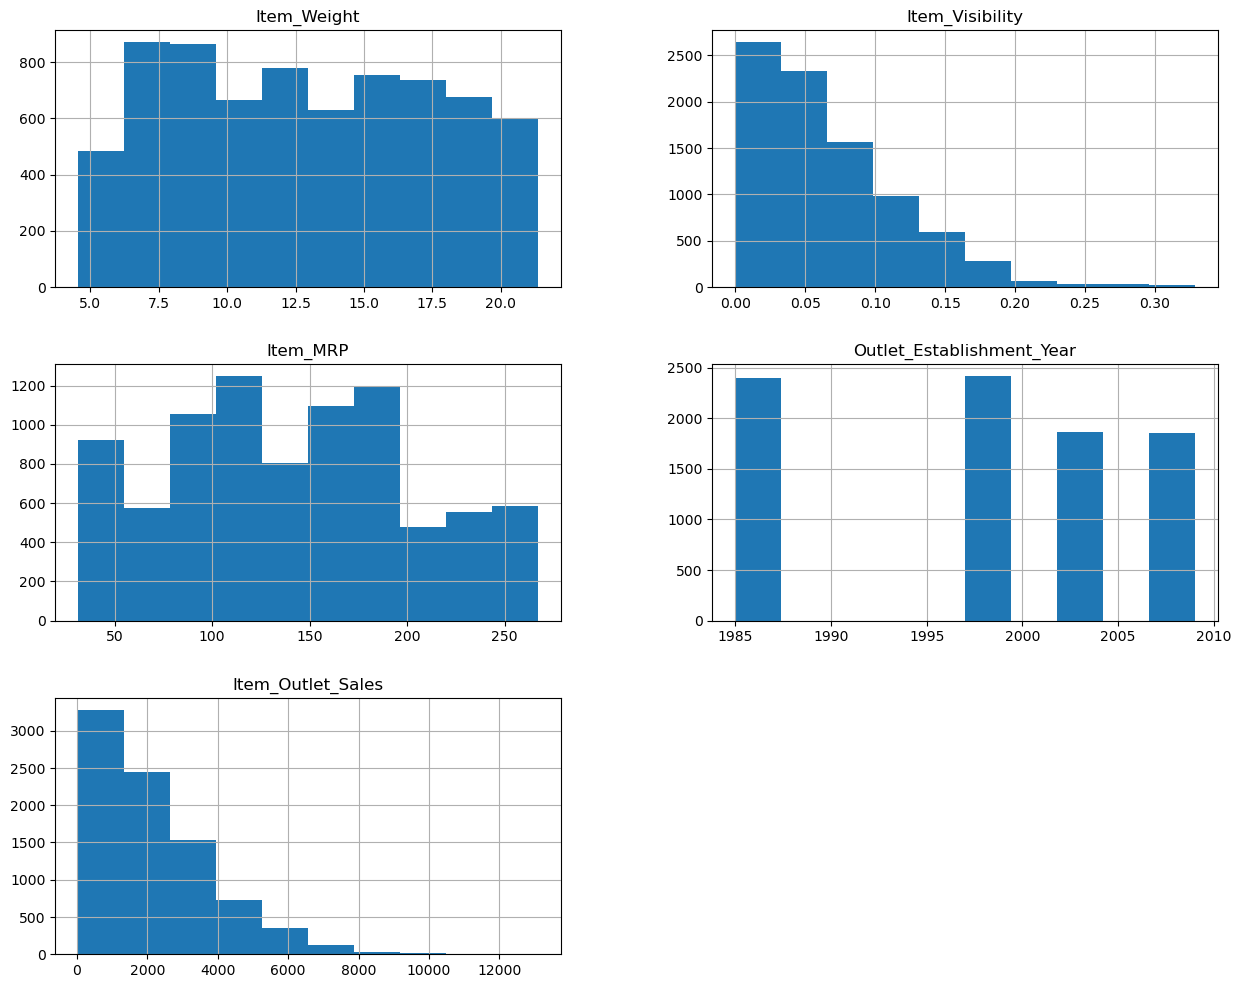

In [32]:
train_data.hist(figsize=(15,12))

# Check for Unique values

In [33]:
print(train_data['Item_Fat_Content'].unique())
print(train_data['Item_Type'].unique())
print(train_data['Outlet_Establishment_Year'].sort_values().unique())
#print(train_data['Outlet_Size'].unique())
print(train_data['Outlet_Location_Type'].unique())
print(train_data['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[1985 1987 1997 1998 1999 2002 2004 2007 2009]
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [34]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('LF', 'Low Fat')
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('low fat', 'Low Fat')
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('reg', 'Regular')

# Check for Outliers

Item_Weight                     Axes(0.125,0.11;0.133621x0.77)
Item_Visibility              Axes(0.285345,0.11;0.133621x0.77)
Item_MRP                      Axes(0.44569,0.11;0.133621x0.77)
Outlet_Establishment_Year    Axes(0.606034,0.11;0.133621x0.77)
Item_Outlet_Sales            Axes(0.766379,0.11;0.133621x0.77)
dtype: object

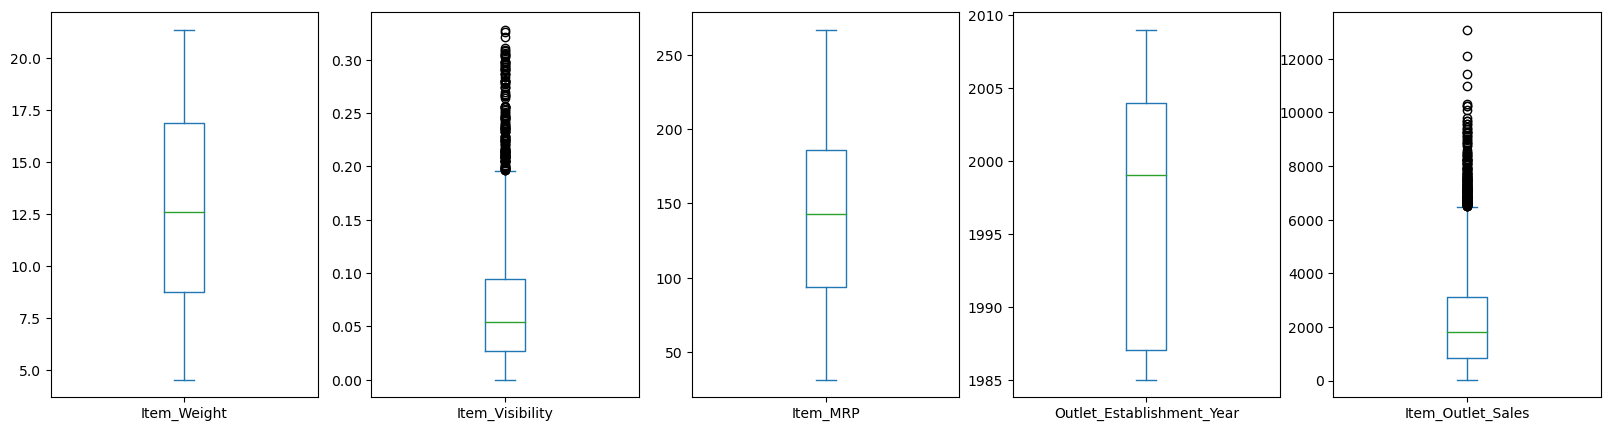

In [35]:
train_data.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

In ITEM OUTLET SALES the outliers can remain there as in some season the sales jump abruptly.

In [36]:
# Removing Outliers
train_data['Item_Visibility']=train_data[train_data['Item_Visibility']<0.18]['Item_Visibility']

# Checking for NULL values

In [37]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               228
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

ITEM WEIGHT, ITEM VISIBILITY and OUTLET SIZE contains null values.

In [38]:
# Checking percentage of NULL values
print("Item Weight NULL value percentage", 1463/8523)
print("Outlet Size NULL value percentage", 2410/8523)
print("Item Visiblity NULL value percentage", 228/8523)

Item Weight NULL value percentage 0.1716531737651062
Outlet Size NULL value percentage 0.2827642848762173
Item Visiblity NULL value percentage 0.026751143963393172


As there are more than 5% NULL values, so we cannot delete those rows and needs to impute them.

ITEM WEIGHT is a numeric column, so it needs to be imputed with MEAN or MEDIAN or MODE.
(MODE is considered more usefull during imputing)

OUTLET SIZE is a categorical column, so it need to be imputed with MODE.

ITEM VISIBLITY is having 2% NULL values, ideally we can drop those, but here we are imputing that as well.

In [39]:
print(train_data['Item_Weight'].mode())
print(train_data['Outlet_Size'].mode())
print(train_data['Item_Visibility'].mean())

0    12.15
Name: Item_Weight, dtype: float64
0    Medium
Name: Outlet_Size, dtype: object
0.06181292964400241


In [40]:
# Imputing the columns
train_data['Item_Weight']=train_data['Item_Weight'].fillna(12.15)
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna('Medium')
train_data['Item_Visibility']=train_data['Item_Visibility'].fillna(0.06181292964400241)

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Univariate Analysis

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

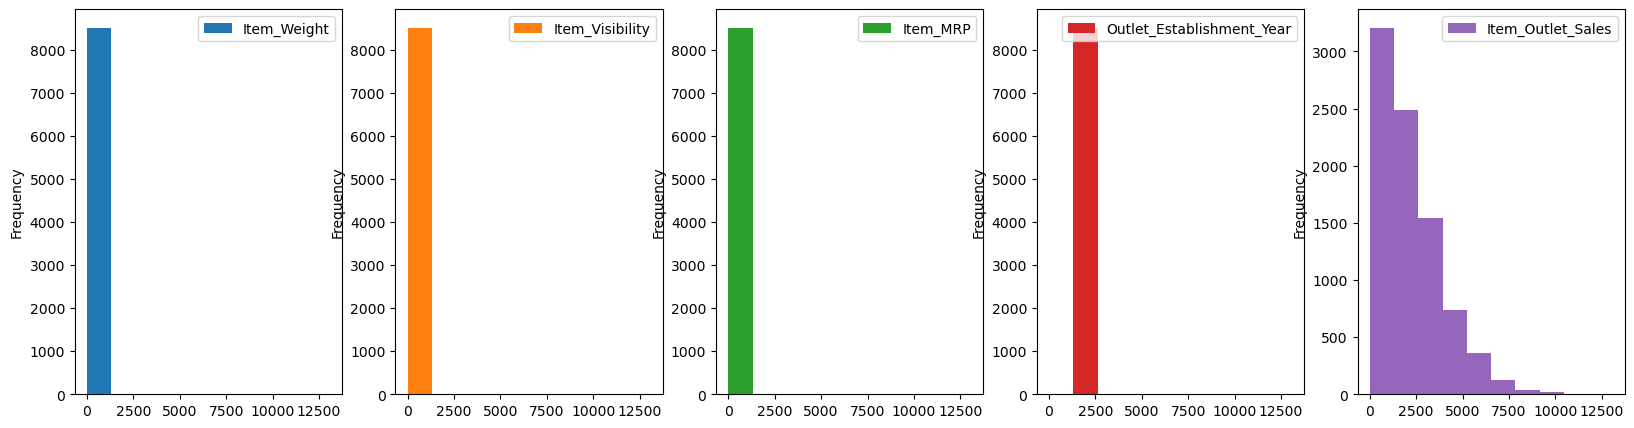

In [42]:
train_data.plot(kind='hist', subplots=True, layout=(1,5), figsize=(20,5))

ITEM VISIBLITY, ITEM MRP and OUTLET ESTABLISHMENT YEAR are having similar data in the dataset.
While ITEM OUTLET SALES is hvaing some very high values like 10000, which can happen. As during some festival seasons the sales can increase exponentially. So, we won't drop those high values nor would impute them.

# Bivariate Analysis

C:\Users\Gangesh\AppData\Local\Temp\ipykernel_2624\501082560.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=train_data.corr()


<Axes: >

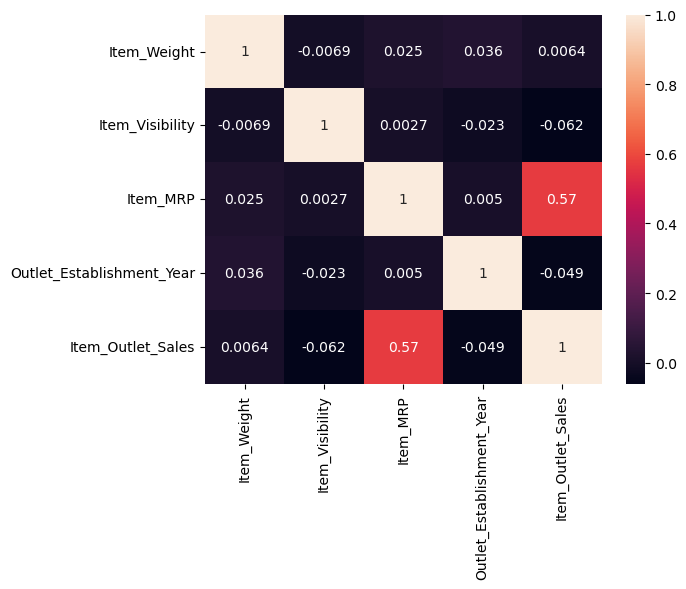

In [44]:
import seaborn as sns
df=train_data.corr()
sns.heatmap(df, annot=True)

We can see that none of the Input features is having high correlation factor (> 0.6) with the Output features.

In [45]:
# sns.barplot(x=train_data['Item_Identifier'], y=train_data['Item_Outlet_Sales'])
# train_data['Item_Identifier'].value_counts()

So, we can see that the ITEM IDENTIFIER is not of so much importance wrt to Output feature.

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

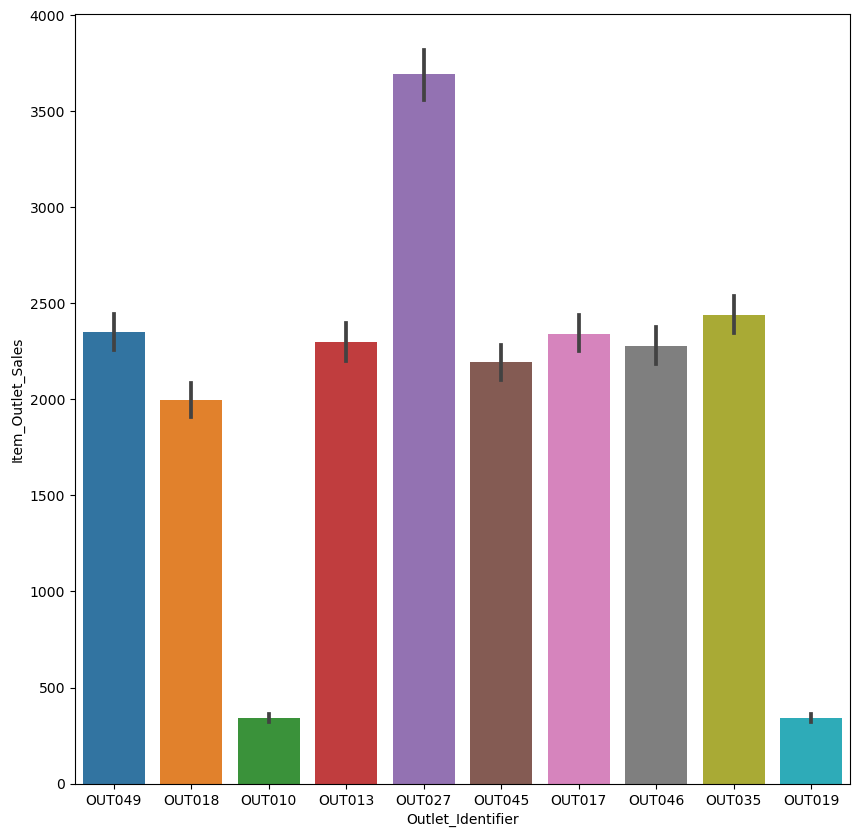

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(x=train_data['Outlet_Identifier'], y=train_data['Item_Outlet_Sales'])
train_data['Outlet_Identifier'].value_counts()

So, we can consider OUTLET IDENTIFIER for Model creation as there are very limited types and for some Outlets the sale is comparitively high

# Removing useless columns

In [47]:
train_data=train_data.drop('Item_Identifier', axis=1)

# Multivariate Analysis

In [48]:
# sns.pairplot(train_data)

# Encoding

Lable Encoder : Item_Fat_Content, Outlet_Size, Outlet_Location_Type

One-hot Encoder : Item_Type, Outlet_Identifier, Outlet_Type

In [49]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train_data['Item_Fat_Content']=label.fit_transform(train_data['Item_Fat_Content'])
train_data['Outlet_Size']=label.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type']=label.fit_transform(train_data['Outlet_Location_Type'])

In [50]:
df=pd.get_dummies(train_data['Item_Type'])
train_data=pd.concat([train_data, df], axis=1)

df=pd.get_dummies(train_data['Outlet_Identifier'])
train_data=pd.concat([train_data, df], axis=1)

df=pd.get_dummies(train_data['Outlet_Type'])
train_data=pd.concat([train_data, df], axis=1)

In [51]:
train_data=train_data.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int32  
 6   Outlet_Location_Type       8523 non-null   int32  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Baking Goods               8523 non-null   uint8  
 9   Breads                     8523 non-null   uint8  
 10  Breakfast                  8523 non-null   uint8  
 11  Canned                     8523 non-null   uint8  
 12  Dairy                      8523 non-null   uint8  
 13  Frozen Foods               8523 non-null   uint8

# Input and Output Feature Split

In [53]:
x_orig = train_data.drop('Item_Outlet_Sales', axis=1)
y_orig = pd.DataFrame(train_data['Item_Outlet_Sales'], columns=['Item_Outlet_Sales'])

In [54]:
y_orig.shape

(8523, 1)

# Linear Regression

In [55]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.5444984952221819
RMSE: 1187.0043343033067


# Lasso Regularization

In [61]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import Lasso
model = Lasso(max_iter=100000)
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE is coming greater than 1, which is more than the expected range of 0 to 1 when the data is standard scaled.

R2 score -0.00024579770948407464
RMSE: 1758.9794452421588


# Ridge Regularization

In [63]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import Ridge
model = Ridge(max_iter=100000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

np.sum(model.coef_ != 0)

R2 score 0.5445834929858073
RMSE: 1186.8935800907288


37

# SVM

In [65]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score 0.5707030087402127
RMSE: 1152.3550758279955


# Decision Tree

In [73]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=2)
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.2638399970278045
RMSE: 1509.0148220750166


# Decision Tree with Grid Search CV

In [74]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

parameter={
    'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter':["best", "random"],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'max_features':["auto", "sqrt", "log2"]
}

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model=DecisionTreeRegressor(random_state=5)
model2=GridSearchCV(model, param_grid=parameter, cv=5, scoring='r2')
model2.fit(x_train, y_train)
display(model2.best_params_)


from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, max_features='auto', splitter='random', random_state=2)
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users

C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users

C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users

C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users

C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users

C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users

C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users

C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'random'}

R2 score 0.553674016958848
RMSE: 1174.9881369398047


C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


# Random Forest

In [68]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

C:\Users\Gangesh\AppData\Local\Temp\ipykernel_2624\4167683468.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


R2 score 0.5501806433307249
RMSE: 1179.5774642850704


# ADABOOST

In [69]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score 0.47195849154708824
RMSE: 1278.031117843262


# XGBOOST

In [71]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.7 MB 4.5 MB/s eta 0:00:23
   ---------------------------------------- 0.2/99.7 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.5/99.7 MB 4.2 MB/s eta 0:00:24
   ---------------------------------------- 0.5/99.7 MB 4.2 MB/s eta 0:00:24
   ---------------------------------------- 0.8/99.7 MB 3.8 MB/s eta 0:00:27
   ---------------------------------------- 1.0/99.7 MB 4.6 MB/s eta 0:00:22
   ---------------------------------------- 1.1/99.7 MB 4.0 MB/s eta 0:00:25
    --------------------------------------- 1.6/99.7 MB 4.7 MB/s eta 0:00:21
    --------------------------------------- 1.7/99.7 MB 4.5 MB/s eta 0:00:22
    ----------------------------

In [72]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.5145810966963535
RMSE: 1225.365755210098


# Best Model : SVM
# Score : 1152

# SVM using cross validation score

In [75]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=5, shuffle=True)

from sklearn.svm import SVR
model = SVR()

from sklearn.model_selection import cross_val_score
score=cross_val_score(model, x, y, cv=kfold, scoring='r2')

print(score.mean())

C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.5819896261548357


# Preparing the TEST data

In [76]:
train_data=pd.read_csv('train.csv')
train_data_orig=train_data

In [78]:
test_data=pd.read_csv('test.csv')
test_data_orig=test_data

test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace('LF', 'Low Fat')
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace('low fat', 'Low Fat')
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace('reg', 'Regular')

test_data['Item_Visibility']=test_data[test_data['Item_Visibility']<0.18]['Item_Visibility']

test_data['Item_Weight']=test_data['Item_Weight'].fillna(12.15)
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna('Medium')
test_data['Item_Visibility']=test_data['Item_Visibility'].fillna(0.06181292964400241)

test_data=test_data.drop('Item_Identifier', axis=1)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
test_data['Item_Fat_Content']=label.fit_transform(test_data['Item_Fat_Content'])
test_data['Outlet_Size']=label.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type']=label.fit_transform(test_data['Outlet_Location_Type'])

df=pd.get_dummies(test_data['Item_Type'])
test_data=pd.concat([test_data, df], axis=1)
df=pd.get_dummies(test_data['Outlet_Identifier'])
test_data=pd.concat([test_data, df], axis=1)
df=pd.get_dummies(test_data['Outlet_Type'])
test_data=pd.concat([test_data, df], axis=1)

test_data=test_data.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

In [79]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('LF', 'Low Fat')
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('low fat', 'Low Fat')
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('reg', 'Regular')

#train_data=train_data.drop(['Item_Weight', 'Item_Identifier', 'Outlet_Size', 'Item_Visibility'], axis=1)

train_data['Item_Visibility']=train_data[train_data['Item_Visibility']<0.18]['Item_Visibility']

train_data['Item_Weight']=train_data['Item_Weight'].fillna(12.15)
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna('Medium')
train_data['Item_Visibility']=train_data['Item_Visibility'].fillna(0.06181292964400241)

train_data=train_data.drop('Item_Identifier', axis=1)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train_data['Item_Fat_Content']=label.fit_transform(train_data['Item_Fat_Content'])
train_data['Outlet_Size']=label.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type']=label.fit_transform(train_data['Outlet_Location_Type'])

df=pd.get_dummies(train_data['Item_Type'])
train_data=pd.concat([train_data, df], axis=1)
df=pd.get_dummies(train_data['Outlet_Identifier'])
train_data=pd.concat([train_data, df], axis=1)
df=pd.get_dummies(train_data['Outlet_Type'])
train_data=pd.concat([train_data, df], axis=1)

train_data=train_data.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

In [80]:
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace('LF', 'Low Fat')
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace('low fat', 'Low Fat')
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace('reg', 'Regular')

#test_data=test_data.drop(['Item_Weight', 'Item_Identifier', 'Outlet_Size', 'Item_Visibility'], axis=1)

test_data['Item_Visibility']=test_data[test_data['Item_Visibility']<0.18]['Item_Visibility']

test_data['Item_Weight']=test_data['Item_Weight'].fillna(12.15)
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna('Medium')
test_data['Item_Visibility']=test_data['Item_Visibility'].fillna(0.06181292964400241)

test_data=test_data.drop('Item_Identifier', axis=1)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
test_data['Item_Fat_Content']=label.fit_transform(test_data['Item_Fat_Content'])
test_data['Outlet_Size']=label.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type']=label.fit_transform(test_data['Outlet_Location_Type'])

df=pd.get_dummies(test_data['Item_Type'])
test_data=pd.concat([test_data, df], axis=1)
df=pd.get_dummies(test_data['Outlet_Identifier'])
test_data=pd.concat([test_data, df], axis=1)
df=pd.get_dummies(test_data['Outlet_Type'])
test_data=pd.concat([test_data, df], axis=1)

test_data=test_data.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

In [81]:
train_data['Outlet_Size'].unique()
#test_data['Outlet_Size'].unique()

array([1, 0, 2])

In [82]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(train_data.drop(['Item_Outlet_Sales'], axis=1))
x_test=scale.fit_transform(test_data)
y=scale.fit_transform(pd.DataFrame(train_data['Item_Outlet_Sales']))

from sklearn.svm import SVR
model = SVR()
model.fit(x,y)

y_pred=pd.DataFrame(model.predict(x_test))
y_pred=scale.inverse_transform(y_pred)

print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_pred.shape)

C:\Users\Gangesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(8523, 37)
(8523, 1)
(5681, 37)
(5681, 1)


from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x=scale.fit_transform(x_orig)
x_test=scale.fit_transform(test_data)
y=scale.fit_transform(y_orig)

from sklearn.svm import SVR
model = SVR()
model.fit(x,y)

y_pred=pd.DataFrame(model.predict(x_test))
y_pred=scale.inverse_transform(y_pred)

print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_pred.shape)

In [83]:
a=pd.DataFrame(test_data_orig[['Item_Identifier', 'Outlet_Identifier']], columns=['Item_Identifier', 'Outlet_Identifier'])
b=pd.DataFrame(abs(y_pred), columns=['Item_Outlet_Sales'])

new=pd.concat([a,b], axis=1)

display(new)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1487.126706
1,FDW14,OUT017,1443.815251
2,NCN55,OUT010,861.524015
3,FDQ58,OUT017,2592.466361
4,FDY38,OUT027,6397.812554
...,...,...,...
5676,FDB58,OUT046,2265.663055
5677,FDD47,OUT018,2494.496805
5678,NCO17,OUT045,1646.867665
5679,FDJ26,OUT017,3972.327368


In [84]:
new[new['Item_Outlet_Sales']<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


In [85]:
new.to_csv('submission.csv', index=False)

In [87]:
train_data2=pd.read_csv('train.csv')
train_data2[(train_data2['Item_Identifier']=='NCR42') | (train_data2['Outlet_Identifier']=='OUT019')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720
63,FDY40,NaN,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
...,...,...,...,...,...,...,...,...,...,...,...,...
8454,NCH54,NaN,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920
8458,FDX20,NaN,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
8469,FDQ45,NaN,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216
8480,FDQ58,NaN,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020


In [89]:
test_data2=pd.read_csv('test.csv')
test_data2[(test_data2['Item_Identifier']=='NCR42') & (test_data2['Outlet_Identifier']=='OUT019')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
30,NCR42,NaN,Low Fat,0.067377,Household,32.09,OUT019,1985,Small,Tier 1,Grocery Store


In [ ]:
## now again i need to do univariate analysis